## 변수 범위
*Python이라고 다르지 않습니다. 해 아래 새로운 것은 없습니다.*

변수의 유효범위는 함수입니다. 함수가 끝나면 변수도 사라져요. (*다른 언어와 마찬가지로 stack기반이기 때문에 그렇습니다.*)

In [2]:
def f1():
    v1 = 10
f1()
v1

NameError: name 'v1' is not defined

naming을 탐색할때 **지역변수 -> 전역변수** 순서로 찾아갑니다. (정확히는 LEGB rule. Local Enclosing Global Builtin순서로 찾습니다.)

In [13]:
# shadowing
a = 10 # global
def f1():
    a = 20 # local이 global을 shadowing
    print(a)
print(a)
f1()
print(a)

10
20
10


In [15]:
# 참고로 builtin은 여기에서 찾습니다.
__builtins__, OSError

(<module 'builtins' (built-in)>, OSError)

In [2]:
# 왜 에러가 나지 않을까요?
def f1(a):
    print(a)
    print(b)

In [4]:
# 실행시점에 에러가 납니다.
f1(11)

11


NameError: name 'b' is not defined

In [5]:
# 실행시점에 b를 찾겠네요.
b = 10
f1(11)

11
10


Python은 코드 실행시점에 변수를 찾습니다. 즉 변수에 대한 잘못된 참조가 Runtime에 발견되기 때문에 주의가 필요합니다. (도구의 도움을 필수적으로 받는 것이 좋습니다.)

In [4]:
# 그렇다면 이것은 왜 에러가 날까요?
# 변수검색하면 b가 안에도 바깥에도 있는데?
b = 6
def f2(a):
    print(a)
    print(b)  # 여기서 에러발생!
    b = 9

f2(10)

10


UnboundLocalError: local variable 'b' referenced before assignment

- python은 line단위로 실행하는 것으로 알고 있는데?
- **실제로는 함수의 body를 통채로 compile합니다.** compile후에 한 라인씩 수행.
- 컴파일 결과 b는 할당연산이 존재하기 때문에 local변수로 결정되었으며 print(b) 수행 시점에 local에서 b를 찾습니다.

In [3]:
b = 6
def f2(a):
    global b  # 이게 필요합니다.
    print(a)
    print(b)
    b = 9
f2(11), b

11
6


(None, 9)

전역변수를 참조하는 것은 상관없지만 <span class="mark">값을 할당하려고 한다면</span> global을 챙겨주세요.

In [6]:
x = 10
def foo():
    x += 1 # x = x + 1
    print(x)
foo()

1


10

In [9]:
lst = [1,2,3]
def foo2():
    lst += [5] # lst = lst + [5]
foo2()

UnboundLocalError: local variable 'lst' referenced before assignment

In [22]:
# 잠깐 복습, 다음의 차이는?
lst = [1,2,3]
lst.extend([4,5])
print(lst)

lst2 = [1,2,3]
lst2 = lst2 + [4,5]
print(lst2)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5]


![](img/lst-visualize.png)

In [24]:
lst = [1,2,3]
def foo2():
    #lst += [5]
    lst.extend([5])
foo2()
lst

[1, 2, 3, 5]

(TIP!) 내가 원하는 실행context에서의 local, global 변수를 찾아볼 수 있습니다.

In [33]:
b = 6
def f2(a):
    global b
    print(a)
    print(b)
    b = 9
    print(locals())
    print(globals()['b'])
f2(1)
print(globals()['b'])

1
6
{'a': 1}
9
9


당연한 것이지만 종종 헷갈릴 수 있는 코드의 실행 순서에 유의하세요. 인터프리터는 소스를 한번에 읽고 실행하기 때문에 지나가지 않은 곳은 미리 알 방법이  없습니다. (컴파일언어는 보통 two-pass로 소스를 탐색합니다.)

In [4]:
def x():
    return b
    
b = 10
print(x())
def y():
    return z() # 왜 에러가 발생할까요?
y() # 이것이 문제입니다.
def z():
    return b

10


NameError: name 'z' is not defined

## CLOSURE

함수내 함수를 정의하는 것을 단순히 closure라고 하지는 않습니다. 그렇지만 함수내 함수를 쓰면서만 closure가 발생하는 것은 맞습니다.

**확장된 변수 범위**를 갖는 **함수**를 closure라고 합니다.
- 함수 내에서 참조할 수 있지만 함수 내 선언되어 있지는 않습니다.
- 함수몸체 밖에 있는 non-global변수를 참조할 수 있습니다.
- 이 변수들을 free-variable이라고 합니다. (*global이 아니면서 local scope에 bound되지 않는 변수*)

In [32]:
# 아직 class는 모르실 수도 있지만;
class Averager():
    def __init__(self):
        self.series = []
    def calculate(self, new_value):
        self.series.append(new_value)
        total = sum(self.series)
        return total / len(self.series)

avg = Averager()
avg.calculate(10)

10.0

In [30]:
# 함수로 간단히(직관적으로) 표현하고자 할 때
def make_averager():
    series = []  # free-variable이라고 합니다.
    def averager(new_value):
        series.append(new_value)
        total = sum(series)
        return total/len(series)
    return averager

avg = make_averager()
avg(10)

10.0

- encapsulated된 변수범위를 포함한 함수를 표현할 때 사용합니다.
- closure 함수는 물론 class로도 표현할 수 있어요.  private 영역을 포함한 객체인스턴스를 생성하는 것과 유사하다고 볼 수 있어요.
- 함수로 표현하는게 간단할때가 있고, class에서의 self 표기법을 탈출할 수 있습니다.

함수의 free-variable을 검사할 수 있어요.

> In computer programming, the term free variable refers to variables used in a function that are neither local variables nor parameters of that function. The term non-local variable is often a synonym in this context.

https://en.wikipedia.org/wiki/Free_variables_and_bound_variables


In [31]:
print(avg.__code__.co_varnames)
print(avg.__code__.co_freevars)
print(avg.__closure__[0].cell_contents)

('new_value', 'total')
('series',)
[10]


In [27]:
# inner는 closure일까요?

a = 1
def outer(b):
    c = 2
    def inner(d):
        e = 10
        return d*e
    return inner

oh = outer(10)
oh(30)

300

In [28]:
print(oh.__code__.co_varnames)
print(oh.__code__.co_freevars)
print(oh.__closure__)

('d', 'e')
()
None


In [4]:
# 나는 어느 c를 보아야만 하는가
a = 1
c = 1
def outer(b):
    c = 2
    def inner(d):
        global c  # or nonlocal c로 테스트해보세요
        c = 30
        e = c*10
        return d*e
    return inner

oh = outer(10)
oh(30), c

(9000, 30)

In [2]:
# closure가 사용될때 나오는 흔한 예
def create_multipliers():
    return [lambda x: i * x for i in range(5)]
for multiplier in create_multipliers():
    print(multiplier(2))

8
8
8
8
8


http://www.pythontutor.com/visualize.html 의 도움을 받아서 살펴보면,
<span class="mark">i는 각 함수의 로컬변수가 아닌 외부변수(자유변수)이기 때문에 실행시점에서 해당 값을 참조하게 됩니다.</span>

![](img/closure-visualize.png)

In [1]:
# closure가 사용될때 나오는 흔한 예(수정됨)
def create_multipliers():
    return [lambda x, y=i: y * x for i in range(5)]
for multiplier in create_multipliers():
    print(multiplier(2))

0
2
4
6
8


![](img/closure-visualize2.png)

In [6]:
# 사실은 좀 풀어쓰면 더 명확해 보입니다.
# closure가 사용될때 나오는 흔한 예
def create_multipliers():
    ret = []
    for i in range(5):
        def _(x,y=i):
            return y*x
        ret.append(_)
    return ret
    # return [lambda x,y=i: y * x for i in range(5)]
for multiplier in create_multipliers():
    print(multiplier(2), multiplier.__code__.co_freevars) # 자유변수가 사라졌습니다.

0 ()
2 ()
4 ()
6 ()
8 ()


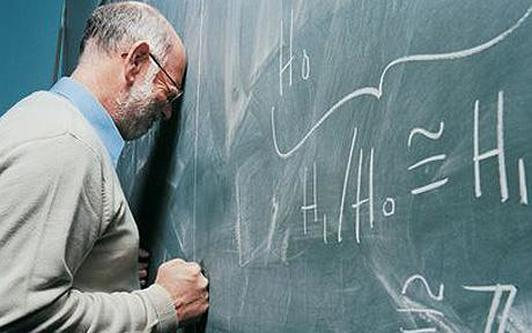
*문제가 발생했을 때 이해할 수 있을 정도로만 파악해두면 좋습니다.*

## NONLOCAL

- nonlocal == global?
- nonlocal == free-var!
- python3에서 추가된 keyword. free-variable로 유지시켜줌.

In [1]:
# global의 반대말이 아니에요/
b = 6
def f2(a):
    nonlocal b  # 갈 곳 없는 b
    b = a
    print(b)
f2(3)
print(b)

SyntaxError: no binding for nonlocal 'b' found (<ipython-input-1-4d50293a816e>, line 3)

In [35]:
def make_averager():
    count = 0
    total = 0
    def averager(new_value):
        count += 1
        total += new_value
        return total / count
    return averager

avg = make_averager()
avg(10)

UnboundLocalError: local variable 'count' referenced before assignment

In [36]:
def make_averager():
    count = 0
    total = 0
    def averager(new_value):
        global count, total
        count += 1
        total += new_value
        return total / count
    return averager

avg = make_averager()
avg(10)

NameError: name 'count' is not defined

In [37]:
count = 0
total = 0
def make_averager():
    def averager(new_value):
        global count, total
        count += 1
        total += new_value
        return total / count
    return averager

avg = make_averager()
avg(10)
avg(20)
count = 10
avg(30)

5.454545454545454

In [39]:
# 우리가 원하는 결과
def make_averager():
    count = 0
    total = 0
    def averager(new_value):
        nonlocal count, total
        count += 1
        total += new_value
        return total / count
    return averager

avg = make_averager()
avg(10)
avg(20)
count = 10
avg(30)

20.0

당장 nonlocal을 어떻게 써야 하지 걱정하지 않아도 됩니다. 다른 사람의 코드를 읽을때 당황하지 않는 것부터 시작합니다.

좀 더 이해하기는 쉬었던 global자체도 유익한 것은 않습니다. 전역변수는 오랜 프로그래밍 역사동안 권장되어 오지 않았습니다.

## EXERCISE

In [1]:
# 다음 실행결과를 예측해봅시다.
def scope_test():
    def do_local():
        spam = "local spam"

    def do_nonlocal():
        nonlocal spam
        spam = "nonlocal spam"

    def do_global():
        global spam
        spam = "global spam"

    spam = "test spam"
    do_local()
    print("After local assignment:", spam)
    do_nonlocal()
    print("After nonlocal assignment:", spam)
    do_global()
    print("After global assignment:", spam) ##!

scope_test()
print("In global scope:", spam)

NameError: name 'spam' is not defined